In [10]:
# Renatto Esteban Guzmán Sosa Carné 21646
# David Jonathan Aragón Vasquez Carné 21053
# Kristopher Javier Alvarado López Carné 21188
# Modelación y Simulación
# Fecha 20/07/2024
# Laboratorio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

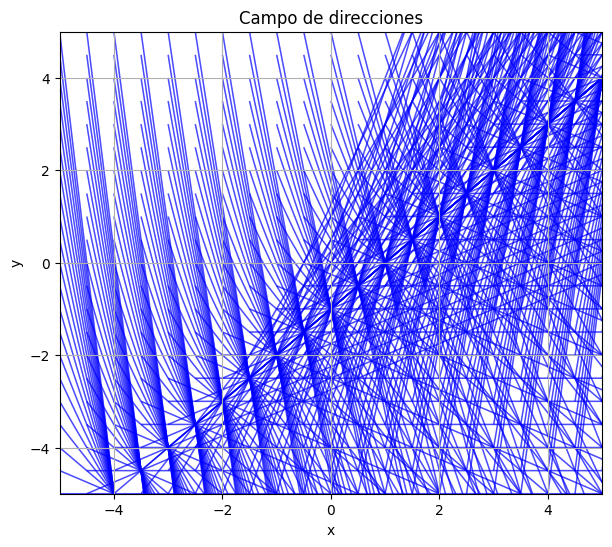

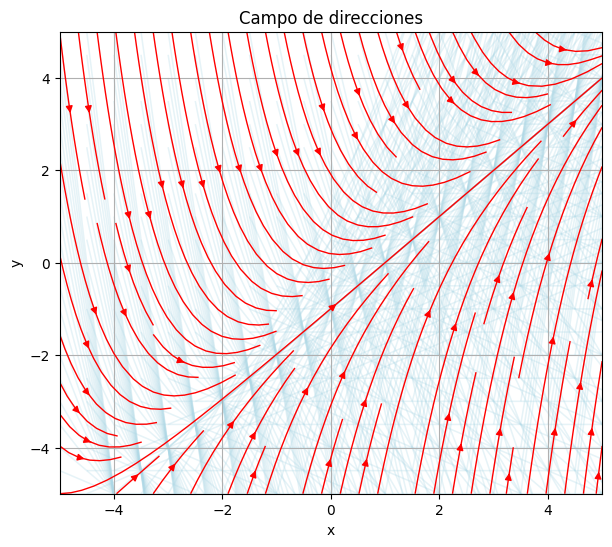

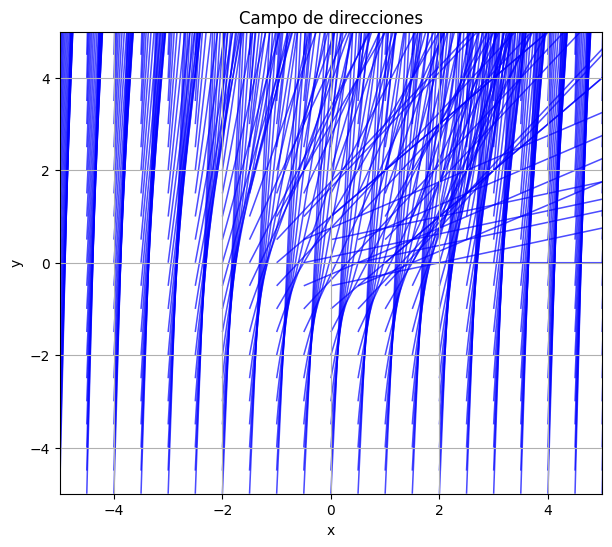

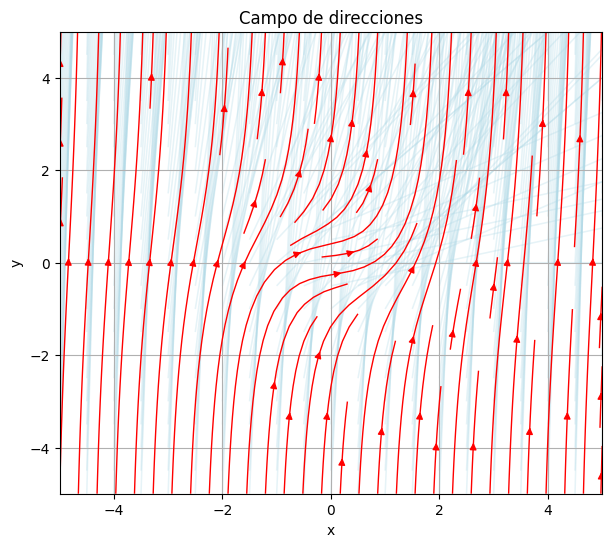

In [2]:
def graficar_campo_direcciones(f, xmin, xmax, ymin, ymax, xstep, ystep, escala=1, unitario=False, flujo=False):
    """
    Grafica el campo de direcciones de una ecuación diferencial de primer orden.

    Parámetros:
    f : función que define la ecuación diferencial dy/dx = f(x,y)
    xmin, xmax : límites del eje x
    ymin, ymax : límites del eje y
    xstep, ystep : pasos para subdividir los ejes x e y
    escala : factor de escala para las flechas (por defecto 1)
    unitario : si es True, grafica el campo unitario (por defecto False)
    flujo : si es True, grafica las líneas de flujo (por defecto False)
    
    Retorna:
    fig : objeto Figure de matplotlib
    """
    
    # Crear la rejilla de puntos
    x = np.arange(xmin, xmax + xstep, xstep)
    y = np.arange(ymin, ymax + ystep, ystep)
    X, Y = np.meshgrid(x, y)
    
    # Calcular los componentes del campo vectorial
    U = np.ones_like(X)
    V = f(X, Y)
    
    # Normalizar si se requiere el campo unitario
    if unitario:
        norm = np.sqrt(U**2 + V**2)
        U /= norm
        V /= norm
    
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Graficar el campo de direcciones
    arrow_color = 'lightblue' if flujo else 'blue'
    arrow_alpha = 0.3 if flujo else 0.7
    ax.quiver(X, Y, U, V, scale=1/escala, scale_units='xy', angles='xy', color=arrow_color, alpha=arrow_alpha)
    
    # Graficar las líneas de flujo si se solicita
    if flujo:
        ax.streamplot(X, Y, U, V, color='r', density=1, linewidth=1, arrowsize=1)
    
    # Configurar los límites y etiquetas
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Campo de direcciones')
    ax.grid(True)
    
    return fig

# Ejemplo 1: dy/dx = x - y
def f1(x, y):
    return x - y

fig1 = graficar_campo_direcciones(f1, -5, 5, -5, 5, 0.5, 0.5, escala=20, unitario=True)
plt.show()

fig2 = graficar_campo_direcciones(f1, -5, 5, -5, 5, 0.5, 0.5, escala=20, flujo=True)
plt.show()

# Ejemplo 2: dy/dx = x^2 + y^2
def f2(x, y):
    return x**2 + y**2

fig3 = graficar_campo_direcciones(f2, -5, 5, -5, 5, 0.5, 0.5, escala=20, unitario=True)
plt.show()

fig4 = graficar_campo_direcciones(f2, -5, 5, -5, 5, 0.5, 0.5, escala=20, flujo=True)
plt.show()

# Ejercicio 3

Resolver la ecuación diferencial: xy′′ + 2y′ = 6x,
haciendo una sustitución adecuada para convertir la ecuación (2) en una EDO de primer orden. A partir de la ecuación de primer orden obtenida, indicar la región del plano R^2 en donde vale el teorema de existencia y unicidad, e indicar aquellas regiones en donde no se cumple.
Analizar en los puntos donde no se cumple el teorema, que es lo que ocurre con las soluciones en estos puntos (hay solución, hay más de una? o no hay soluciones).


In [3]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
# Definir variables simbólicas
x = sp.Symbol('x')
y = sp.Function('y')(x)


z = sp.Function('z')(x) # z es ahora una función de x
z_def = sp.Eq(z, y.diff(x)) # Hacer la sustitución z = y'


# Paso 1: Resolver la ecuación diferencial
def resolve_eq_for_sustituion(eq):

    
    #print(f"z_def: {z_def}")
    #print(f"Ecuación original: {eq}")

    # Hacer la sustitución z = y'
    # EQ: xy'' + 2y' = 6x
    eq_sust = eq.subs(y.diff(x), z)
    eq_sust = eq_sust.subs(y.diff(x, 2), z.diff(x))

    # Queda: x*z' + 2z = 6x

    #print(f"Ecuación después de la sustitución: {eq_sust}")

    

    # Simplificar la ecuación
    # x*z' + 2z = 6x

    # Resolver la ecuación de primer orden
    sol = sp.dsolve(eq_sust, z)

    print("Solución de la ecuación de primer orden:")
    print(sol)

    # Integrar para obtener y(x)
    z_expr = sol.rhs
    sol_y = sp.integrate(z_expr, x)
    sol_y = sol_y + sp.Symbol('C2')  # Añadir constante de integración
    print("\nSolución para y(x):")
    print(sp.Eq(y, sol_y))
    
    return sol, sp.Eq(y, sol_y)

In [5]:
# xy'' + 2y' = 6x
# Definir la ecuación diferencial correctamente
eq = sp.Eq(x*y.diff(x, 2) + 2*y.diff(x), 6*x) 

# Ejecutar los pasos
sol, eq_sust = resolve_eq_for_sustituion(eq)

Solución de la ecuación de primer orden:
Eq(z(x), C1/x**2 + 2*x)

Solución para y(x):
Eq(y(x), -C1/x + C2 + x**2)


In [6]:
# Dividir la ecuación por x para obtener la forma estándar
eq_divided_by_x = sp.Eq((x*y.diff(x, 2))/x + (2*y.diff(x))/x, (6*x)/x)

# y'' + 2y'/x = 6
print(f"eq_divided_by_x: {eq_divided_by_x}")

# Aislamos los términos de la ecuación diferencial
lhs = eq_divided_by_x.lhs - eq_divided_by_x.rhs
print(f"lhs: {lhs}")
# Extraemos los coeficientes de y' y y
P = lhs.coeff(sp.Derivative(y, x, 1))
Q = lhs.coeff(y)

# Extraemos g(x)
g = eq_divided_by_x.rhs

# Mostramos los resultados
P_x = P / sp.Derivative(y, x, 1)
Q_x = Q / y

print(f"P(x) = {P_x}, Q(x) = {Q_x}, g(x) = {g}")

eq_divided_by_x: Eq(Derivative(y(x), (x, 2)) + 2*Derivative(y(x), x)/x, 6)
lhs: Derivative(y(x), (x, 2)) - 6 + 2*Derivative(y(x), x)/x
P(x) = 2/(x*Derivative(y(x), x)), Q(x) = 0, g(x) = 6


In [7]:
def es_continua_en_puntos_cercanos(func, x_cercano):
    """
    Comprueba si una función es continua en un punto x_cercano
    evaluando los límites de la función en dos puntos cercanos.
    """
    valor = func.subs(x, x_cercano)
    if valor.is_number and sp.simplify(valor).is_finite:
        return f"Continua en x = {x_cercano}, valor: {valor}"
    else:
        return f"No continua en x = {x_cercano}"

# Verificar la continuidad de P(x) en puntos cercanos a x = 0
x_cercano = 1
print(f"P: {P}")
print(es_continua_en_puntos_cercanos(P, x_cercano))

P: 2/x
Continua en x = 1, valor: 2


Ecuacion a resolver con problemas iniciales: Eq(y(x), -C1/x + x**2)


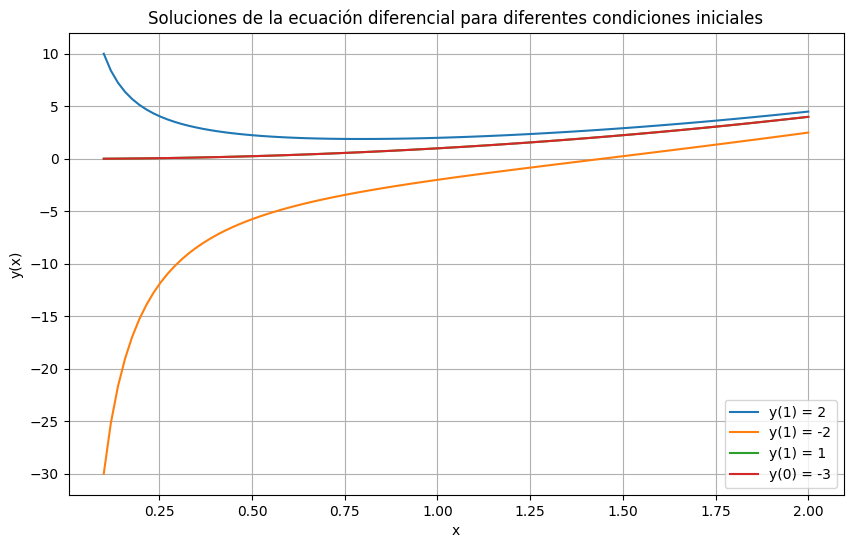

In [27]:
C1, C2 = sp.symbols('C1 C2')

# Función para resolver con las condiciones iniciales
def resolver_condiciones_iniciales(sol, conds):
    sol_y = sol.rhs
    ics = {y.subs(x, cond[0]): cond[1] for cond in conds}
    sol_const = sp.solve([sol_y.subs(x, cond[0]) - cond[1] for cond in conds])
    sol_y = sol_y.subs(sol_const)
    return sol_y

# Condiciones iniciales
condiciones = [
    (1, 2),
    (1, -2),
    (1, 1),
    (0, -3)
]

# Graficamos las soluciones
x_vals = np.linspace(0.1, 2, 100)
plt.figure(figsize=(10, 6))
print(f"Ecuacion a resolver con problemas iniciales: {eq_sust.subs('C2', 0)}")

for cond in condiciones:
    sol_y = resolver_condiciones_iniciales(eq_sust.subs('C2', 0), [cond])
    #sol_y = sol_y.subs('C2',0)
    sol_y_func = sp.lambdify(x, sol_y, "numpy")
    y_vals = sol_y_func(x_vals)
    plt.plot(x_vals, y_vals, label=f'y({cond[0]}) = {cond[1]}')

# Configuramos el gráfico
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Soluciones de la ecuación diferencial para diferentes condiciones iniciales')
plt.legend()
plt.grid(True)
plt.show()



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.500e+00  1.505e+00 ...  1.995e+00  2.000e+00]
        y: [[ 0.000e+00 -2.724e-03 ... -3.108e-01 -3.144e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


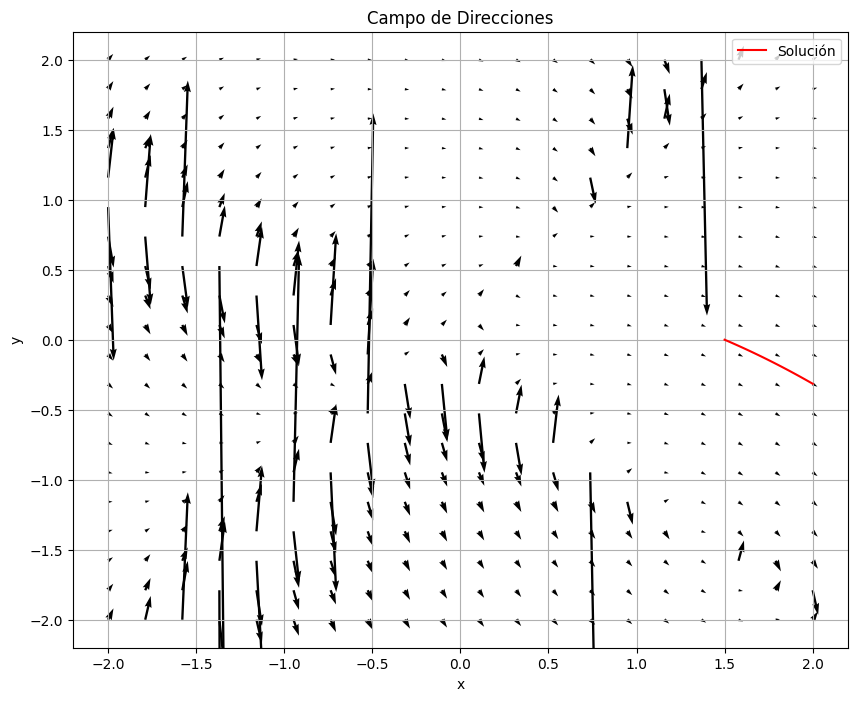

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la ecuación diferencial
def f(x, y):
    return (x - 3*y - 3*(x**2 - y**2) + 3*x*y) / (2*x - y + 3*(x**2 - y**2) + 2*x*y)


x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
U = np.ones_like(X)
V = f(X, Y)


plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, angles='xy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Direcciones')


sol = solve_ivp(f, [1.5, 2], [0], t_eval=np.linspace(1.5, 2, 100))
print(sol)

plt.plot(sol.t, sol.y[0], 'r', label='Solución')
plt.legend()
plt.grid()
plt.show()


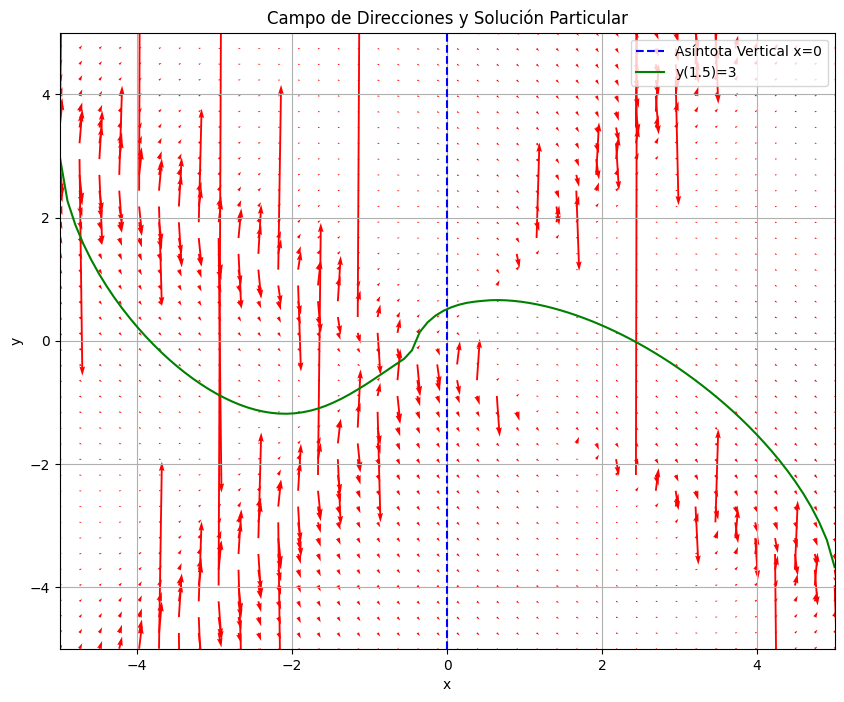

In [5]:
x = np.linspace(-5, 5, 40)  
y = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, y)
U = np.ones_like(X)
V = f(X, Y)

# Graficar el campo de direcciones
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, angles='xy', color='r')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de Direcciones y Solución Particular')


plt.axvline(x=0, color='b', linestyle='--', label='Asíntota Vertical x=0')

# Resolver la ecuación diferencial para una condición inicial específica
y0 = 3
sol = solve_ivp(f, [x[0], x[-1]], [y0], t_eval=np.linspace(x[0], x[-1], 100))

# Graficar la solución particular
plt.plot(sol.t, sol.y[0], 'g', label=f'y(1.5)={y0}')

plt.legend()
plt.grid()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()
